<a href="https://colab.research.google.com/github/marcinwolter/SimpleNeuralNet/blob/master/ANN_regresion_with_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Based on https://github.com/nageshsinghc4/Artificial-Neural-Network-from-scratch-python/blob/master/ANN_with_one_hidden_layer.py
# M. Wolter, May 2020

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

scores=[]
lossV=[]
iterV=[]

num_passes=200000


In [0]:

class Config:
    nn_input_dim = 1  # input layer dimensionality
###    nn_output_dim = 2  # output layer dimensionality
    nn_output_dim = 1  # output layer dimensionality
     # Gradient descent parameters (I picked these by hand)
    epsilon = 0.01  # learning rate for gradient descent
    reg_lambda = 0.000000001  # regularization strength

    num_hidden_nodes = 60



In [0]:


def generate_data():
    np.random.seed(0)
    ##X, y = datasets.make_moons(200, noise=0.20)
    
    X = np.zeros((200,1), dtype=float)
    y = np.zeros((200,), dtype=float)
    for i in range(0,200):
      X[i] = float(i)/25.
      y[i] = -np.cos(X[i,0])/5.+np.random.normal(0.,0.1)
      
      X[i] = X[i]/8.

    from sklearn.utils import shuffle
    X,  y = shuffle(X,  y, random_state=0)  

    #print(X, y)
    return X, y


In [0]:


def visualize(X, y, model):

  

    plt.figure(figsize=(12,8))

    plt.title("Fit to experimental data",fontsize=16) 
    plt.scatter(X,y,s=10)

    XX = np.linspace(min(X), max(X), num=50)
    plt.plot(XX,predict(model,XX),linewidth=3,color='orange',linestyle='solid', label="final fit")
    for k in range(0,len(scores)):
       if k % 5000 == 0 or k<4:
         plt.scatter(X,scores[k],s=1,label='iter='+str(k*10))
         #plt.scatter(X,scores[k],s=1,label='loss='+str(lossV[k]))

    #plt.plot(coo,res,c='red',label='dopasowanie')
    #plt.plot(coo,exact,c='black',label='dokładna funkcja')

    plt.legend(prop={'size':14})

    plt.xlabel('$x$',fontsize=15)
    plt.ylabel('$y$',fontsize=15);

    
    plt.show()
    #plot_decision_boundary(lambda x:predict(model,x), X, y)
    #plt.title("Logistic Regression")

    plt.figure(figsize=(12,8))

    plt.title("Loss",fontsize=16) 
    plt.plot(iterV,lossV, color='green', marker='', linestyle='dashed', linewidth=2, markersize=12)
    plt.ylim(0.,2.0*sum(lossV)/len(lossV))

    plt.xlabel('$iter$',fontsize=15)
    plt.ylabel('$Loss$',fontsize=15);

    
    plt.show()   



In [0]:

def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()



In [0]:

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model, X, y):
    num_examples = len(X)  # training set size
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = z2 #np.exp(z2)
      
    scores.append(exp_scores)

###    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    probs = exp_scores 
   # Calculating the loss
###    corect_logprobs = -np.log(probs[range(num_examples), y])
###    data_loss = np.sum(corect_logprobs)
    chi2 = (probs-y)*(probs-y)
    data_loss = np.sum(chi2)

    # Add regulatization term to loss (optional)
    ###data_loss += Config.reg_lambda / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / num_examples * data_loss



In [0]:

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = z2 #np.exp(z2)
    probs = exp_scores #/ np.sum(exp_scores, axis=1, keepdims=True)
    #return np.argmax(probs, axis=1)
    print("exp_scores predict ",exp_scores[0:10,])
    return probs


# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations


In [0]:

def build_model(X, y, nn_hdim, num_passes=10000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    num_examples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(Config.nn_input_dim, nn_hdim) / np.sqrt(Config.nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, Config.nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, Config.nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):
        batch_len=20
        Xb=np.zeros((batch_len,1))
        yb=np.zeros((batch_len,))
        rr = np.random.randint(0,len(X),batch_len)
        for k in range(batch_len):
          Xb[k] = X[rr[k]]
          yb[k] = y[rr[k]]

        # Forward propagation
        #print(Xb,W1)
        #print(Xb.dot(W1))
        z1 = Xb.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = z2 #np.exp(z2)
#        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        probs = exp_scores 


        #print("exp_scores ",exp_scores)
        #print("y ",yb)
        ###print(np.sum(exp_scores, axis=1, keepdims=True))
        # Backpropagation
        delta3 = probs
        for j in range(0,len(yb)):
          #print(j)
          delta3[j] = -yb[j]+delta3[j]
#        delta3[range(num_examples), y] -= 1
        #print("delta3 ",delta3[0:10,])

        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(Xb.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        ###MW dW2 += Config.reg_lambda * W2
        ###MW dW1 += Config.reg_lambda * W1

        # Gradient descent parameter update
        #print("W1 ",W1.shape)
        #print("W2 ",W2.shape)
        #print("W1 ",W1,dW1)
        #print("W2 ",W2,dW2)
        #print('b1 ',b1,db1)
        #print('b2 ',b2,db2)
        W1 += -Config.epsilon * dW1
        b1 += -Config.epsilon * db1
        W2 += -Config.epsilon * dW2
        b2 += -Config.epsilon * db2

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 10 == 0:
            loss = calculate_loss(model, X, y)
            print("Loss after iteration %i: %f" % (i, loss))
            lossV.append(loss)
            iterV.append(i)

    return model



In [0]:

def classify(X, y):
    # clf = linear_model.LogisticRegressionCV()
    # clf.fit(X, y)
    # return clf

    pass


In [85]:



X, y = generate_data()
model = build_model(X, y, Config.num_hidden_nodes,  num_passes, print_loss=True)
    



Streaming output truncated to the last 5000 lines.
Loss after iteration 150010: 9.319753
Loss after iteration 150020: 9.552977
Loss after iteration 150030: 9.670718
Loss after iteration 150040: 9.553589
Loss after iteration 150050: 10.115018
Loss after iteration 150060: 9.329151
Loss after iteration 150070: 9.790316
Loss after iteration 150080: 9.682113
Loss after iteration 150090: 9.980759
Loss after iteration 150100: 9.853672
Loss after iteration 150110: 9.335125
Loss after iteration 150120: 9.346194
Loss after iteration 150130: 9.661355
Loss after iteration 150140: 9.631805
Loss after iteration 150150: 9.248519
Loss after iteration 150160: 9.525438
Loss after iteration 150170: 10.093976
Loss after iteration 150180: 9.236752
Loss after iteration 150190: 9.678302
Loss after iteration 150200: 9.385839
Loss after iteration 150210: 10.292235
Loss after iteration 150220: 9.582055
Loss after iteration 150230: 9.189459
Loss after iteration 150240: 9.098656
Loss after iteration 150250: 9.222

exp_scores predict  [[-0.16691571]
 [-0.15745649]
 [-0.14867885]
 [-0.14025302]
 [-0.13178592]
 [-0.12282744]
 [-0.11288434]
 [-0.10144362]
 [-0.08800705]
 [-0.07213743]]


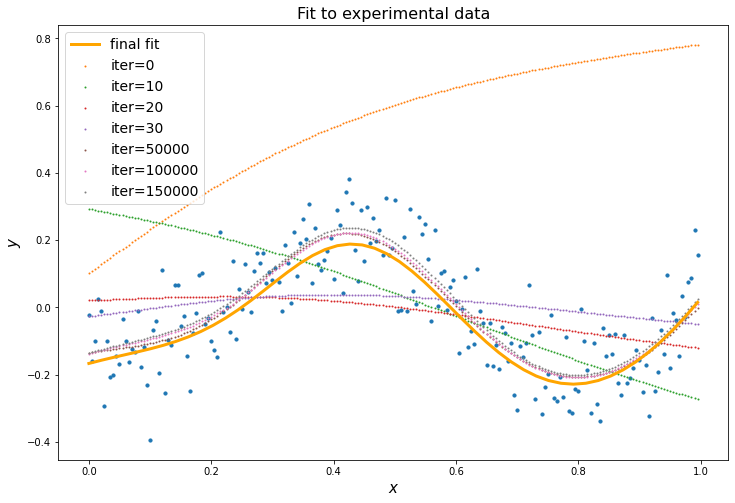

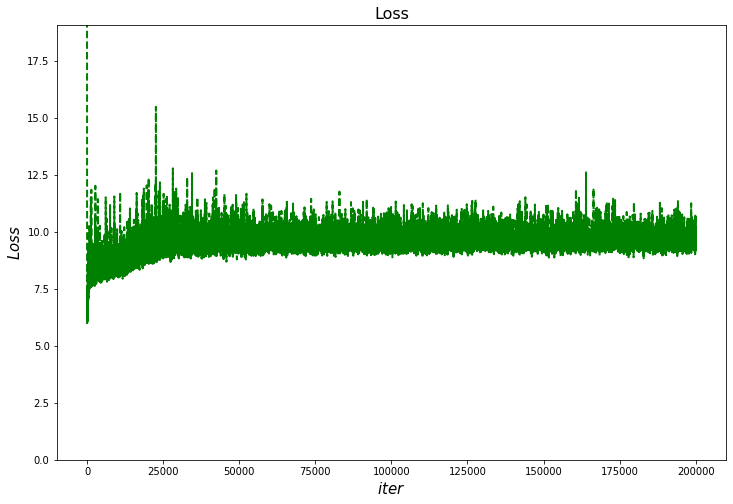

In [88]:
visualize(X, y, model)